# Decision Trees
## Artificial Intelligence in Games

<img src="Imagens\SupervisedLearning.jpg" alt="Imagens\SupervisedLearning.jpg" style="width: 350px;"/>


## Content

* Decision Trees
    * Data Matrix Processing
    * Using Decision Tree classifier from Scikit-learn
    * Making predictions and tree representation
    * Decision Tree visualization in text and graphic modes.
    * Evaluate the learnied models
    * Train and test data sets
    * Overfitting
    * Cross-validation
    * Evaluation metrics



## Introduction

This tutorial needs the following libraries:
* **NumPy:** This module is fubdamental as it contais functionalities for multidimensional arrays, mathematical functions like operations over matrices. More detaila on numpy <a href="https://numpy.org/">here</a>. A **numpy array ** is a fundamental data structure in `scikit-learn`, and `ndarray` is the main data structure of `numpy`. A `ndarray` means ut has n dimensions and all elements have the same type.
* **Pandas:** This module enables the manipulation of sets of data: to read, to write and to analyse and transform data. More details abount `pandas` <a href="https://pandas.pydata.org/">here</a>.
* **Scikit-learn:** This is the main module in machine learning in python. More detail about `scikit-learn` <a href="https://scikit-learn.org/stable/">here</a>.

#### Checking the versions of the main python modules

Before starting to work it is necessary to check the modules versions.  Assim, o scikit-learn (*sklearn*) terá de ser a **versão >= 0.21** para que se possa visualizar as árvores de decisão de uma forma simples. Além disso, o `pandas` >= 1.0. Instruções de como instalar o scikit-learn podem ser encontradas <a href="https://scikit-learn.org/stable/install.html">aqui</a>.

Uma forma rápida de verificarem as versões dos módulos é executarem o seguinte código:

In [2]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
executable: c:\Users\frede\AppData\Local\Programs\Python\Python312\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 25.1.1
   setuptools: 69.2.0
        numpy: 1.26.4
        scipy: 1.13.0
       Cython: None
       pandas: 2.2.1
   matplotlib: 3.8.4
       joblib: 1.5.0
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\frede\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: C:\Users\frede\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff

#### Numpy

Lets try to create an instance of a `ndarray` from `numpy`.

In [3]:
import pandas as pd
import numpy as np

In [4]:
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
type(x)

numpy.ndarray

The access to the elements is like a list:

In [6]:
x[0]

array([1, 2, 3])

In this case a list of lists

In [7]:
x[0][1]

2

## 1. Introduction to Decision Trees

<img src="Imagens\treetree.jpg" alt="Imagens\treetree.jpg" style="width: 300px;"/>


The decision trees are able to deal with features categorical and numeric at the same dataset. This is one of the advantages along with the intelegibility. Some of the decision trees algorithms, like C4.5, are natively able to deal with categorical features, while others like  <a href="https://medium.com/analytics-vidhya/classification-in-decision-tree-a-step-by-step-cart-classification-and-regression-tree-8e5f5228b11e">CART</a>, require data tranfrmation in order to deal with categorical values. **In Scikit-learn, for example, every machine learning algorithms are implemented in such a way they can receive numerical values.**

**Scikit-learn uses an optimized version of the algorithm <a href="https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart">CART</a>** (*Classification and Regression Trees*), that allows binary (2 classes) and multi-class (various classes), and **learns binary trees** (i.e., for each decision node there are always 2 branches). In order to learn decision trees or any other non-numeric classifierde, `Scikit-learn` requires a data transformation on the attributes or features known as codification.

## A simples and standard example. Play or not play Tennis?

<img src="Imagens\tennisplayer.gif" alt="Imagens\tennisplayer.gif" style="width: 250px;"/>

In the decision tree construction we need to find the best way to divide the multidimensional data space of a problem in a way to optimize the reduce the average entropy in the branches.

Lets use a data set composed of 14 data items abiut the 13 days in the past where we have decided to play tennis or not. [In this dataset](https://www.kaggle.com/fredericobreno/play-tennis) we have 4 environmental features (*outlook, temp, humidity and wind*) and a dependent variable (*play*).

The goal is to try to build the greedy decision tree where we minimize an heuristic, the average entropy. Our goal is to have pure leafs wuth items either with `play="Yes"` or `play="No"`

We will use the pandas library to read and manage a data text file: <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ht">DataFrame</a>

In [8]:
import pandas as pd
df_tennis= pd.read_csv("Data/tennis.txt", sep="\t")
df_tennis

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


Before starting the learning process we need to explicitely separate the dependent from the independent variables and use only the relevant columns of the data set (columns 1,2,3 and 4); we need also th extract the feature names - they will be useful in the future to interpret the resulting models.

In [9]:
col_idxs=[1,2,3,4]
col_names=np.array(df_tennis.columns)[col_idxs]
col_names


array(['outlook', 'temp', 'humidity', 'wind'], dtype=object)

Lets display the attribute values ignoring the last column correspondig to the leaning class:

In [10]:
X = df_tennis.values[:,col_idxs]
print(X)

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Strong']
 ['Overcast' 'Cool' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]


Now we display only the class values, item :

In [11]:
y = df_tennis.values[:,5]
print(y)

['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


### 1.1. Processing the data matrice

In Pandas, the `get_dummies()` function converts categorical variables into dummy/indicator variables (known as one-hot encoding). This method is especially useful when preparing data for machine learning algorithms that require numeric input.

Syntax: pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, drop_first=False, dtype=None)


The function returns a DataFrame where each unique category in the original data is converted into a separate column, and the values are represented as True (for presence) or False (for absence).
Scikit-learn classifires cannot use categorical data, they have to be tranformed in binary data.

In [12]:
# build the dataframe X
df_tennis_X=df_tennis[col_names]
# covert into dummy DataFrame
df_tennis_Xdum = pd.get_dummies(df_tennis_X, columns = col_names)
# Extract the new featre names.
col_names_dum=np.array(df_tennis_Xdum.columns)

df_tennis_Xdum

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
6,True,False,False,True,False,False,False,True,True,False
7,False,False,True,False,False,True,True,False,False,True
8,False,False,True,True,False,False,False,True,False,True
9,False,True,False,False,False,True,False,True,False,True


Lest inspect our data, now binary:

In [13]:
Xdum=df_tennis_Xdum.values
Xdum

array([[False, False,  True, False,  True, False,  True, False, False,
         True],
       [False, False,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False, False, False,  True, False,  True, False, False,
         True],
       [False,  True, False, False, False,  True,  True, False, False,
         True],
       [False,  True, False,  True, False, False, False,  True, False,
         True],
       [False,  True, False,  True, False, False, False,  True,  True,
        False],
       [ True, False, False,  True, False, False, False,  True,  True,
        False],
       [False, False,  True, False, False,  True,  True, False, False,
         True],
       [False, False,  True,  True, False, False, False,  True, False,
         True],
       [False,  True, False, False, False,  True, False,  True, False,
         True],
       [False, False,  True, False, False,  True, False,  True,  True,
        False],
       [ True, False, False, False, False, 

Lets access the attribute's names:

In [14]:
col_idxs=list(range(9))
dummy_col_names=np.array(df_tennis_Xdum.columns)[col_idxs]
dummy_col_names

array(['outlook_Overcast', 'outlook_Rain', 'outlook_Sunny', 'temp_Cool',
       'temp_Hot', 'temp_Mild', 'humidity_High', 'humidity_Normal',
       'wind_Strong'], dtype=object)

We might see the dummy varaibles with their binary values, in fact the boolean values are treated as numeric, as integers. 

In [15]:
# build the dataframe X
df_tennis_X=df_tennis[col_names]
# covert into dummy DataFrame
df_tennis_Xdum = pd.get_dummies(df_tennis_X,dtype=int)
# Extract the new featre names.
int_col_names_dum=np.array(df_tennis_Xdum.columns)

df_tennis_Xdum

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


### 1.2. Training a Decision Tree classifier using scikit-learn

There exists naturally in the scikit-learn library a class for finding the decision tree model that better fits the data and we can play with the parameters: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">`DecisionTreeClassifier`</a>. 

```python
DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
```
As you may see, this class has a great number of arguments, but we are going to use only the most relevant:
* `criterion = entropy` - the default parameter value is "Gini", but we will use  **(`entropy`)**

We are going to create a decision tree using every default values for the parameters except `criterio` where we use `entropy`. First we need to create the decision tree instance and the we might use only the adequate methods for this lab notebook, but there are others:
* `fit(X,y)` - build (traines) a decision tree with the data `X` and class `y`
* `predict(X)` - predict the class value for data `X`
* `get_depth()` - returns the tree depth. that corresponds to the maximal distance between the roor and the leafs.

Note that `X` is a *ndarray* in the formate we have explained earlier (instances x attributes) and `y` is an array with the class for each data instance or item.

Therefore, the procedure is the following:

* Incialize the classifier, eventually defining the fit parameters.
* Feet the classifier to the data using the method `fit(X, y)` that has the data matrice (X), and the class array (Y)
* Make predictions for a new data setusing the method `predict(X)` - the input is the matrice of data.

We start the learning process by creating the tree and fitting it to the training data

In [16]:
from sklearn.tree import DecisionTreeClassifier

sk_dt=DecisionTreeClassifier(criterion = "entropy")
sk_dt.fit(Xdum, y)

DecisionTreeClassifier(criterion='entropy')

We will predict the classs of new data instances or examples later. Now we want to display the tree

## 2. Decision Tree Display


### 2.1 Decision tree in txt mode

<img src="Imagens\asciiTree.PNG" alt="Imagens\asciiTree.PNG" style="width: 250px;"/>

The function <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text">`tree.export_text()`</a> displays the tree in txt mode as a hierachy of induced rules.
```python
export_text(decision_tree, *, feature_names=None, max_depth=10, spacing=3, decimals=2, show_weights=False)
```
the following arguments are the most relevant for displaying the tree in a hierarchica form:
* `decision_tree` - the learned tree
* `feature_names` - a list with the attribute's names. If nothing is passed then we will have feature_0, feature_1, ...

The tree will be composed by boolean pseudo-attributes of the kind $x \le \delta$ Os $\delta s$ which are the intermediary points. In this case, as we have binary attributes: 0 or 1, the cutting point is the average:  0.5.

In [17]:
from sklearn.tree import export_text
the_tree = export_text(sk_dt,feature_names=list(col_names_dum))
print(the_tree)

|--- outlook_Overcast <= 0.50
|   |--- humidity_Normal <= 0.50
|   |   |--- outlook_Rain <= 0.50
|   |   |   |--- class: No
|   |   |--- outlook_Rain >  0.50
|   |   |   |--- wind_Weak <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- wind_Weak >  0.50
|   |   |   |   |--- class: Yes
|   |--- humidity_Normal >  0.50
|   |   |--- wind_Strong <= 0.50
|   |   |   |--- class: Yes
|   |   |--- wind_Strong >  0.50
|   |   |   |--- temp_Mild <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- temp_Mild >  0.50
|   |   |   |   |--- class: Yes
|--- outlook_Overcast >  0.50
|   |--- class: Yes



### 2.2.Display the trees graphically

<img src="Imagens\triii.gif" alt="Imagens\triii.gif" style="width: 250px;"/>

Podemos contudo melhorar o output, exportanto o resultado para o formato de imagem que pode ser visualizado no notebook. O scikit-learn tem uma forma de o fazer através da função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html">`plot_tree`</a>
```python
plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)
```
the following arguments are the most relevant to visualize the decision tree:
* `decision_tree` - The trained tree
* `feature_names` - list with the names of the attributes, otherwise X[0], X[1], ...
* `class_names` - list with the name of the classes, otherwise no classification will appear in the leaves.
* `filled` - `False` by default. in case the value is `True`, the tree nodes are filled with a color that indicates the classes: it will be the one that is most frequent in the data that fits de respective decision tree branch, since the root.

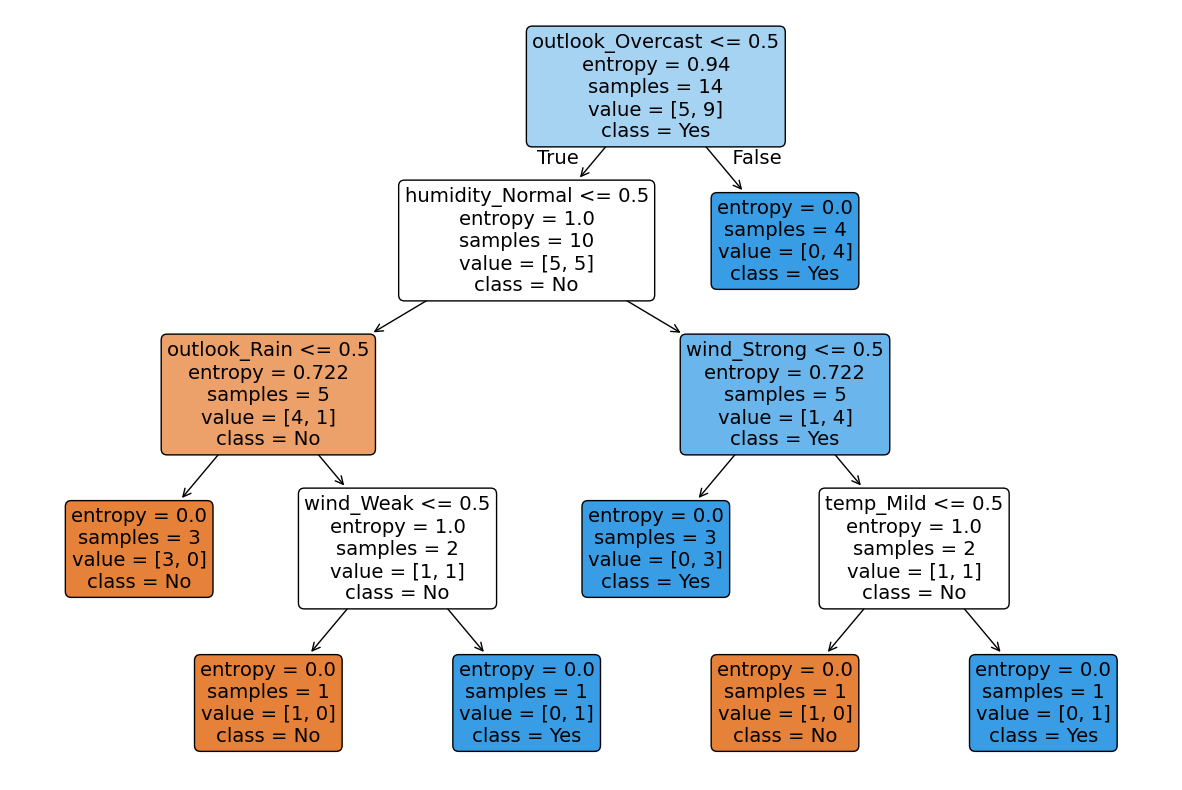

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10]) # width, height in inches
plot_tree(sk_dt, 
          feature_names=col_names_dum,
          class_names=["No", "Yes"],
          filled=True, rounded=True)
plt.show()

Each tree node contains: 1) the entropy value in the examples, number of data examples, the way they are distributed in terms of the different classes and the class in the majority of the examples.

#### 2.2.1. A more automatic display

We can devolp a function to make the display:

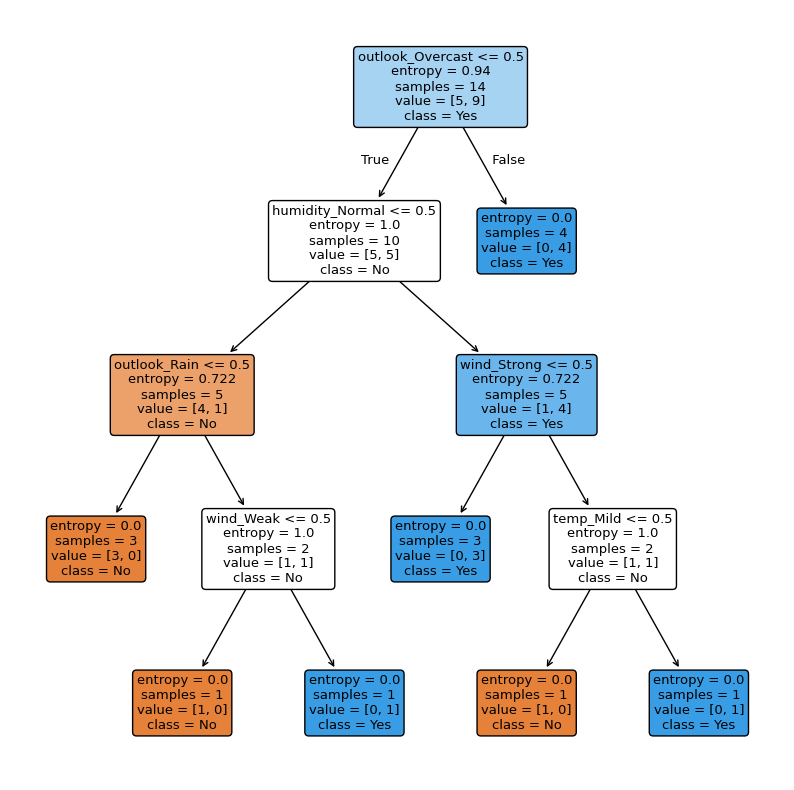

In [19]:
import matplotlib.pyplot as plt
def display_tree(tree, feature_names, class_names, figsize=(10,10)):
    plt.figure(figsize=figsize) # width, height in inches
    plot_tree(tree, 
          feature_names=feature_names,
          class_names=class_names,
          filled=True, rounded=True)
    plt.show()

display_tree(sk_dt, col_names_dum,["No", "Yes"])

## 3. Predictions
After the model built we can use it to predict new examples. In this case, we will test with the same data used to train the model, the training data composed with 14 examples in order to verify if results are coherent

In [20]:
preds = sk_dt.predict(Xdum)
for i in range(df_tennis_Xdum.shape[0]):
    print(f"real Class: {y[i]}; Predicted Class: {preds[i]} ")
    
print("\nTotal Number of errors or wrong predictions: ", sum(preds!=y))

real Class: No; Predicted Class: No 
real Class: No; Predicted Class: No 
real Class: Yes; Predicted Class: Yes 
real Class: Yes; Predicted Class: Yes 
real Class: Yes; Predicted Class: Yes 
real Class: No; Predicted Class: No 
real Class: Yes; Predicted Class: Yes 
real Class: No; Predicted Class: No 
real Class: Yes; Predicted Class: Yes 
real Class: Yes; Predicted Class: Yes 
real Class: Yes; Predicted Class: Yes 
real Class: Yes; Predicted Class: Yes 
real Class: Yes; Predicted Class: Yes 
real Class: No; Predicted Class: No 

Total Number of errors or wrong predictions:  0


Yeah, the model is perfect in terms of predicting the training data classes. Of ocurse we want that it will predict future data not used for learning. But we will deal with that later.

## 5. Unidimensional numeric data
Lets see a data composed with the 9 points or examples with only one feature and two classes.

<img src="imagens\Dados!D.PNG" alt="imagens\Dados!D.PNG" style="width: 450px;"/>


In [21]:
df_1dim= pd.read_csv("Data/oneDimensionData.csv", sep=",")
df_1dim

,X,Y
0,1,o
1,2,o
2,3,x
3,4,o
4,6,x
5,8,x
6,11,x
7,11,o
8,12,o


In [22]:
col_idxs=[0]
col_names=np.array(df_1dim.columns)[col_idxs]
col_names

array(['X'], dtype=object)

In [23]:
X = df_1dim.values[:,col_idxs]
print(X)

[[1]
 [2]
 [3]
 [4]
 [6]
 [8]
 [11]
 [11]
 [12]]


In [24]:
y = df_1dim.values[:,1]
print(y)

['o' 'o' 'x' 'o' 'x' 'x' 'x' 'o' 'o']


Lets train the decision tree using entropy

In [25]:
sk_dt=DecisionTreeClassifier(criterion = "entropy")
sk_dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [26]:
the_tree = export_text(sk_dt,feature_names=list(col_names))
print(the_tree)

|--- X <= 2.50
|   |--- class: o
|--- X >  2.50
|   |--- X <= 11.50
|   |   |--- X <= 3.50
|   |   |   |--- class: x
|   |   |--- X >  3.50
|   |   |   |--- X <= 5.00
|   |   |   |   |--- class: o
|   |   |   |--- X >  5.00
|   |   |   |   |--- X <= 9.50
|   |   |   |   |   |--- class: x
|   |   |   |   |--- X >  9.50
|   |   |   |   |   |--- class: o
|   |--- X >  11.50
|   |   |--- class: o



In the limit case, for X=11 where we have 2 with distinct classes, how was it solved? Well, it was solved in the favor of the `o` class simply because there are more examples of the class `o` than the class `x`.

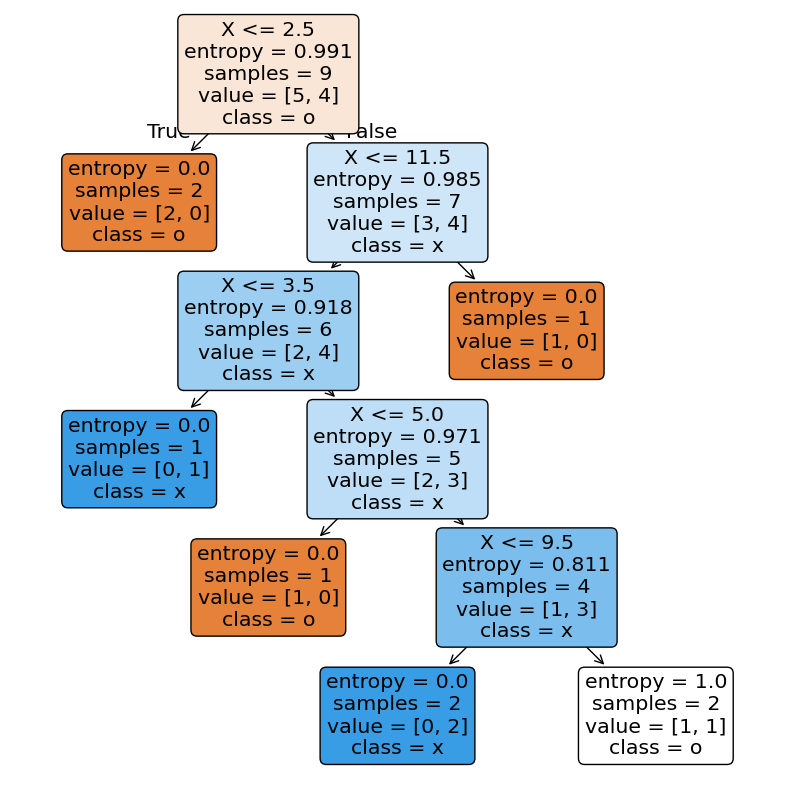

In [27]:
display_tree(sk_dt, col_names,["o", "x"])

## 5. A classical example - the Iris dataset

<img src="Imagens\iris.jpg" alt="imagens\iris.jpg" style="width: 150px;"/>

The Iris dataset is a famous dataset with flowers from 3 species (setosa, versicolor and virginica), in which for a group of Iris the petals and sepals length and width were measured. This dataset is included in the module <a href="https://scikit-learn.org/stable/datasets/index.html#toy-datasets">`datasets`</a> and might be loades using the function `load_iris`. 

The datase is inside the field named *data* and is composed of 150 examples with 4 features each. The data is represented by a `ndarray` that corresponds to a matrice (array of arrayss), where each line has the values of the measures made on the petals and sepals of each Iris flower. 
We may inspect the names of each feature (*feature_names*).Besides, it is still possible to obtain the classes names (*target_names*) and the class associated to each one of the instances of the dataseto de dados (*target*). The value of *target* is also an array, with a dimension of 150, that represent the class of the 150 instances.

In [28]:
from sklearn.datasets import load_iris

d_iris=load_iris()
X=d_iris["data"]
y=d_iris["target_names"][d_iris.target]

In [29]:
d_iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
d_iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

As it is easier to work with the `dataframe`, we should convert the `ndarray` obtained from the inout data (matrice `X`) into a `dataframe`:

In [31]:
pd.DataFrame(X, columns=d_iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In clear contrast with the tennis dataset all variables are continuous and we do not need to make any other processing in the data, enabling us to go directily to the process of building a model that fits the data.

Lets build and display the Iris tree. We use two methods to show the tree length and number of leaves:`get_depth()` and  `get_n_leaves()` 

Tree depth: 5
Number of leaves: 9


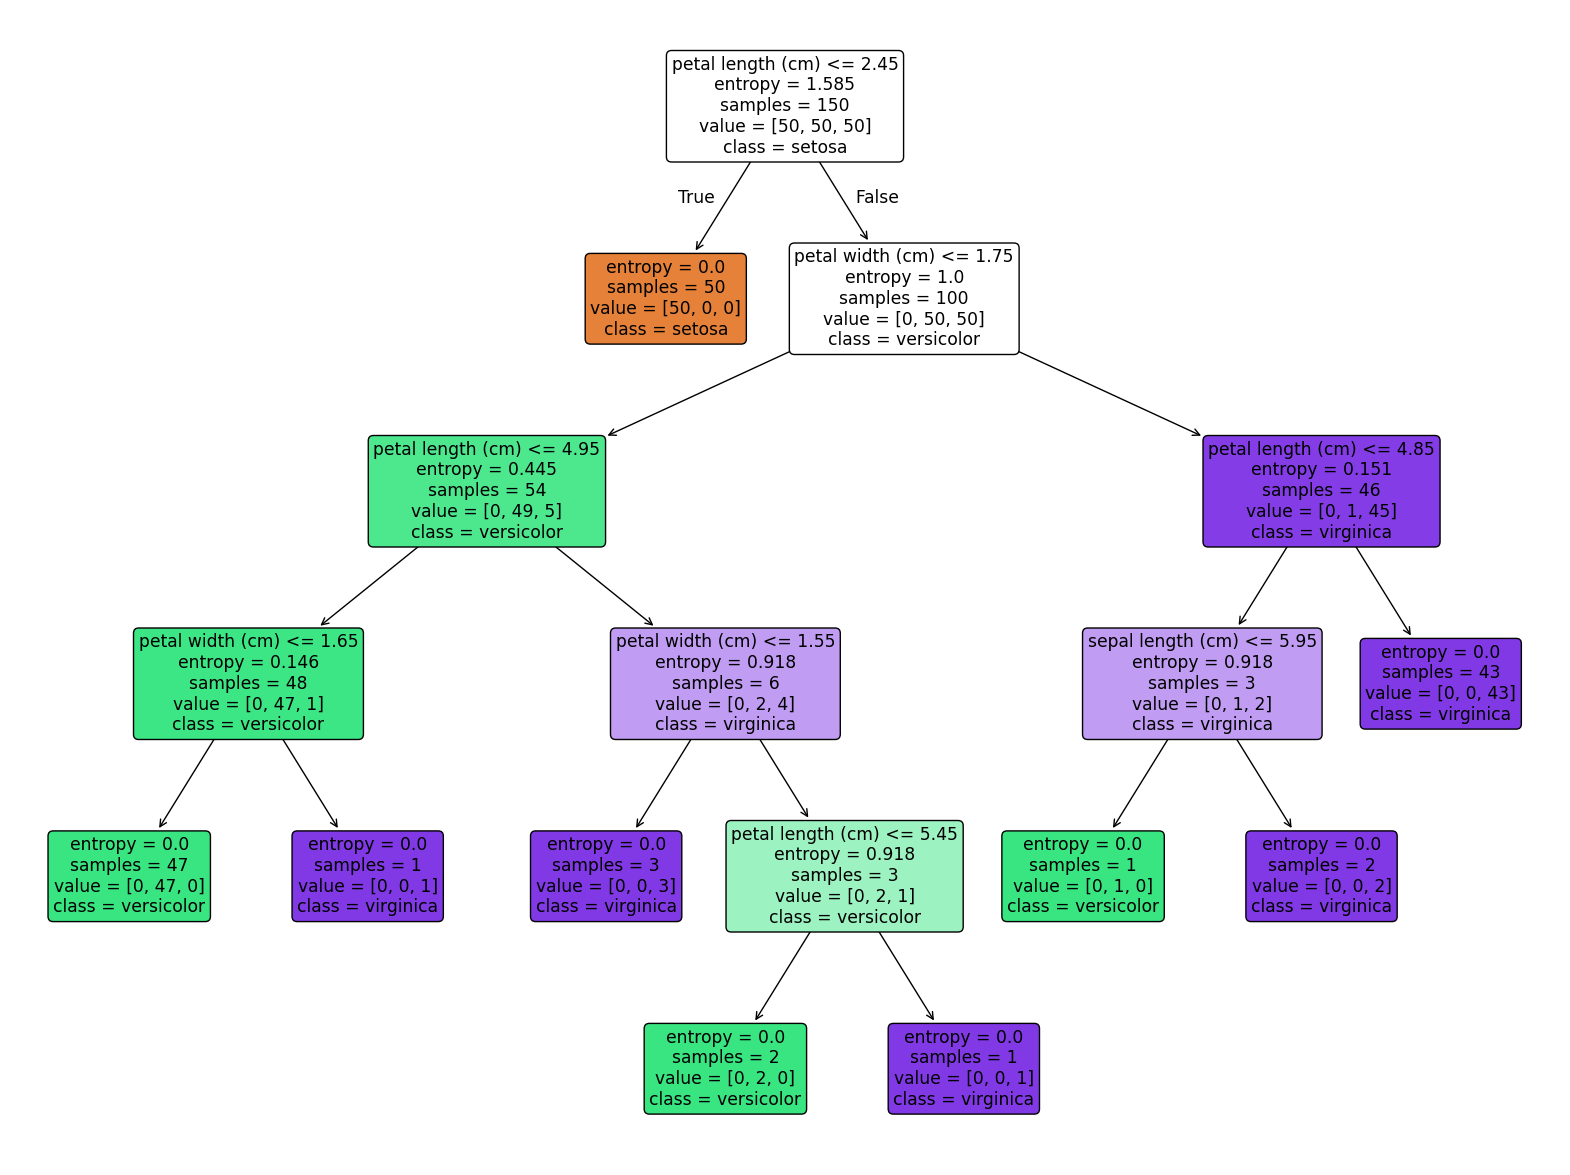

In [32]:
#from sklearn.datasets import load_iris
#from sklearn.tree import DecisionTreeClassifier, plot_tree

# leitura dos dados
iris_data = load_iris()
X = iris_data['data']
y = iris_data['target_names'][iris_data.target]

# construção do modelo
dt_iris = DecisionTreeClassifier(criterion='entropy')
dt_iris.fit(X,y)
print('Tree depth:', dt_iris.get_depth())
print('Number of leaves:', dt_iris.get_n_leaves())

# Visualizr a árvore de decisão obtida
plt.figure(figsize=[20,15]) # width, height in inches
plot_tree(dt_iris, 
          feature_names=iris_data['feature_names'],
          class_names=iris_data['target_names'],
          filled=True, rounded=True)
plt.show()

We can predict the class of a new example using the `predict` method:

In [33]:
a=np.array([[1.5,2.4,1.6,5]])

In [34]:
dt_iris.predict(a)

array(['setosa'], dtype='<U10')

We can use get_params()` in order to get all the parameters

In [35]:
dt_iris.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## 6. Evaluate Machine Leaning Models

In order to evaluate a classifier quality of a classifier we cannot use the data used to build it, and there are several methods for dealing with the classifiers validation, namely:

* Cross-validation method *holdout* (a round of cross validation) in which the data set is divided into train and test data. The model is fitted with the train data and verified with test data.
* K-fold cross validation (K-fold CV). Data are divide in K separated sets, and for each set, a model is fitted to the k-1 remaining sets and validated in the set. In this way, the original data set is used for training and testing, and we need to fit k models.
* leave-one-out is essentially a limit case of K-fold CV, where k is equal to the dataset length $N$ and we fit and validate $N$ clasifiers.

In every case, chosen the best classifier model and its parameters, the full set is used to generate the final classifier. 

### 6.1. Validate a model using a train and test set

In order to validate a model we use new data (not used durig model training) for which we have the right supervised classificaton. This is done dividing the dataset into 2 parts.  (In this case the 150 examplos of the iris dataset). One part of the data is named **train set**, is used to train our model, and the rest of the dataset forms the **test set** and they will be used to verify the model quality and performance in temros of generallzation, predicting the right class of new and unseen examples.

Scikit-learn has a function <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">`train_test_split`</a> that shuffles the dataset and divides it into 2 parts. This function, by default, extracts 75% of the dataset lines into the train set, and generates the trainset. The remaining 25% form the test set. These percentages can be adjusted but a 75%-25% split is considered a good practice (*rule of thumb*).

This function has some useful parameters:
* the first 2 arguments are the data matrice and the class vector;
* `test_size` - by default it uses the `train_size` complement or or 0.25 if `train_size` is not defined;
* `train_size` - by default it uses the `test_size` complement, and corresponds to the percentage of points to consider in the training set;
* `random_state` - controls the randomness in the examples choice: if we set it to some integer it is possible to replicate te shuffling process and clone an experience.

It returns 4 outputs:
* the train set (`X_train`);
* the test set (`X_test`), they are both numpy arrays with the features data:
* the train classes (`y_train`);
* the test classes (`y_test`), both are numpy arrays.

### 6.2  Train and test data split in the Iris dataset
Lets divide the Iris dataset using the default percentages:

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    random_state=2)

We have 112 instances or points for training (just the feature values

In [37]:
X_train.shape

(112, 4)

and the corresponding classes

In [38]:
y_train.shape

(112,)

and 38 for validation

In [39]:
X_test.shape

(38, 4)

Next we build a decision tree uisng only the train set.

In [40]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

We are able to make prediction suing the test set and compare them wit the True claases (`y_test`), obtaining the *accuracy* of our model, the fraction of the test flowers that were correctly predicted. 

In order to obtain the accuracy we use the `score` method from the class `DecisionTreeClassifier`.

In [41]:
dtc.score(X_test, y_test)

0.9473684210526315

Thus in this model the test accuracy is aproximately of 0.947, which means that 94.7% test set flowers were correctly classified. Another way to interpret this number is that we predict that in the future our model will classify 94.7% of the flowers correctly.

Note that in the case of the accuracy on the train set we have 100&. Generally the accuracy in the train set is higher than the test set one - the train set has a larger size than the test set.

In [42]:
dtc.score(X_train, y_train)

1.0

### 6.3. Overfitting and Underfitting

Overfitted models are the ones that are too much fitted to the training data inhibiting them to generalize well to new yet unseen data - a high ccuracy in the training data and a low one in the test data. This is why the parameters enter in action. We usually want to look for the best parameters to create our models. Using the same train data we vary parameters and For each set of parameters we build a model and validate them in the test set..

In this case we are going to vary the `min_samples_split` decision tree parameter (between 2 and 10). The parameter sets the number of minimun points necessary to split a node. If the value is 2 it means that we can split a node even if there are 2 points - trees are not pruned and may be divided until a node has 1 or 0 items or points. 

Lets create those 9 nodels and mesure the resulting accuracy in the train and test sets. We build a graphic to display the accuracies.

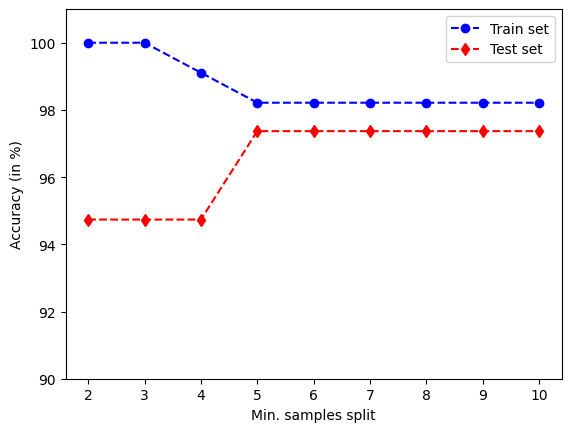

In [43]:
import matplotlib.pyplot as plt

train = []
test = []
for i in range(2,11):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(90,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

In the training set the accuracy is 100% when the parameter has a value of 2 and 3 and this means that the learned trr is too much fitted to the trainings set and as the test set is not the highest onem it will be able to improve the generalization to new data.

Note that if we increase too much the parameter value (p.ex., `min_samples_split=42`), the model will not be able to learn. The accuracy in the train decreases and it also decrease in the test set.y **underfitting** to data.

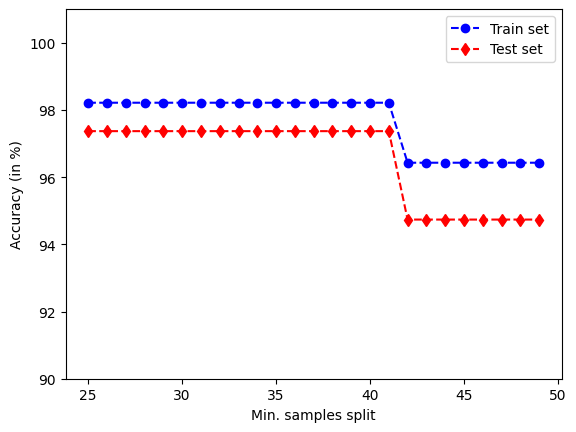

In [44]:
train = []
test = []
for i in range(25,50):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(25,50,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(90,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

In resume, **overfitting** occurs if we fit the model to the particularities of the train set, resulting in a too much complex model unable to generalize to new data. **Underfitting** occurs if the model is too simple being unable to capture all the aspects and variabilities of the data, with a poor performance in both sets.

### Other parameters to control overfititng
* `max_depth` - by dfault it is `None`, but we can choose an integer for this parameter. It won't go on splitting if the tree max depth is exceeded.
* `min_samples_split` - tem o valor de 2 por defeito, mas pode-se escolher um valor inteiro para este parâmetro. Este parâmetro não permite expandir a árvore para subconjuntos da dados menores que um dado valor, i.e., proibe o algoritmo de dividir nós com menos do que o  número de exemplos fornecido.
* `min_samples_leaf` - 1 by default. This parameter defines the minimum number if examples in the leafs. There won'be any slit that results in a leaf with less than the value of the parameter.

These parameters by be combined in order to control overfitting.

Lets vary max_depth from 1 ro 5 and plot the accuracy performance in both sets: train and test

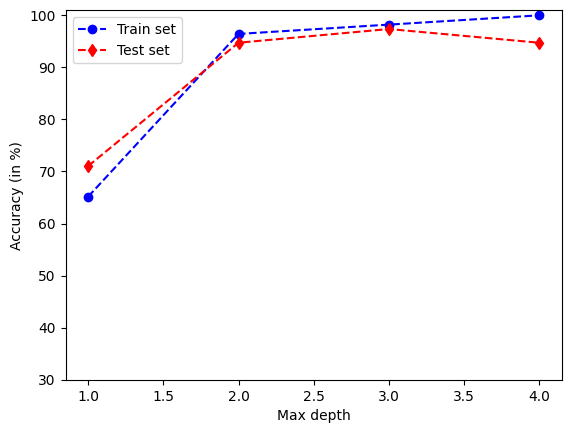

In [45]:
train = []
test = []
for i in range(1,5):
    ad = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(1,5,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,101) # limite dos eixo dos yy's
plt.xlabel('Max depth') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

### PostPruning
The parameters we have seen deal with pre-pruning the tree, during the tree generation process. There are techniques for post-pruning the that deal with overfitting.
See for example:<a href="https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html">`cost complexity pruning`</a> 

### Repeated spliting intor train and test: shuffling
Our train and test split is random. And qwe may try other divisins. What happens if we make a different random split? (through a change in the values of `random_state`). 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    random_state=8)
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print('Decision Tree')
print('Accuracy train:', dtc.score(X_train,y_train))
print('Accuracy test:', dtc.score(X_test,y_test))

Decision Tree
Accuracy train: 1.0
Accuracy test: 0.8947368421052632


again...

In [47]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    random_state=18)
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print('Árvore de decisão:')
print('Accuracy train:', dtc.score(X_train,y_train))
print('Accuracy test:', dtc.score(X_test,y_test))

Árvore de decisão:
Accuracy train: 1.0
Accuracy test: 0.9736842105263158


and again...

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    random_state=3)
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print('Árvore de decisão:')
print('Accuracy train:', dtc.score(X_train,y_train))
print('Accuracy test:', dtc.score(X_test,y_test))

Árvore de decisão:
Accuracy train: 1.0
Accuracy test: 0.9736842105263158


### 6.4. Cross Validation

In order to evaluate the +erformance of our model we are going to resort to a robust validation technique named **k-fold cross-validation**.
In k-fold cross-validation, we randomly split the dataset into k independent folds (partitions), where k-1 folds are used to train the model and o 1 fold is used to test it. This process is repeated k times, obtaining k different models  and k accuracy measures. One magic number of folds widely used is k=10.

<img src="imagens\cross_validation.png" width="500">

Therefore, it will be necessary to create *k* partitions of the dataset, train a model for each of the partitions and calculate the k models accuracies. Only later we can compute the average accuracy which will be a estimate of the model performance obtained from the full dataset. 

Scikit-learn has a function, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">`cross_val_score`</a>, which has the following most relevant arguments:
```python
cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```
* `estimator` - o objeto com o modelo que se quer ajustar, neste caso será um objeto da classe `DecisionTreeClassifier`
* `X` - features dataset
* `y` - classes dataset 
* `cv` - number of folds

Ok no more talking. We are going to evaluate a decision tree classifier by cross validation, plotting the average accuracy and standard deviation

In [49]:
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtc,
                         X=iris_data['data'],
                         y=iris_data['target'],
                         cv=10
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	1.0
	0.9333333333333333
	1.0
	0.9333333333333333
	0.9333333333333333
	0.8666666666666667
	0.9333333333333333
	0.9333333333333333
	1.0
	1.0
Average CV accuracy: 0.953 +/- 0.043


We can conclude that our model will be correct on average in 96% of the cases. There is some variation: the accuracy ranges from 87% to 100%. This may signify that the model is very sensible to a certain division in particular but mignt be due to a small dataset.

But as we have seen we can experiment with other parameters to avoid overfitting:

### 7. Useful metrics for binary classifiers

There are several concepts  [here](https://en.wikipedia.org/wiki/Confusion_matrix) retirada da matriz de confusão:

* `TP` - True positives - positive instances correctly classified
* `TN` - True negatives - negative instances correctly classified
* `FP` - False positives - positve instances incorrectly classified
* `FN` - False negatives - positve instances incorrectly classified

The most common metrics:

* $Precision =\frac{TP}{TP+FP}$ - the fraction of true positives given the predicted as positives
* $Recall =\frac{TP}{TP+FN}$ - the fraction of true positives given the positivess (also known as Sensitivity)
* $Specificity=\frac{TN}{TN+FP}$ -  the fraction of negatives correctly classified given all negatives (not so relevant for probelms where the number of positives is much lower than the number of negatives)
* $F1=2\frac{Precision\times Recall}{Precision+Recall}$ - harmonic average between Precision and Recall. It is a good metric as aggregates precision and recall. 

Scikit-learn possess all these metrics [e muitas outras](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

Let's apply them.

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

y = np.array(y>=200, dtype="int") #criação das classes a partir dos valores do target

dtc_diabetes = DecisionTreeClassifier(criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
dtc_diabetes.fit(X_train, y_train)

preds_diabetes = dtc_diabetes.predict(X_test)

print("Árvore original")
print("A accuracy é: %7.4f" % accuracy_score(y_test, preds_diabetes))
print("A precision é: %7.4f" % precision_score(y_test, preds_diabetes))
print("O recall é: %7.4f" % recall_score(y_test, preds_diabetes))
print("O score F1 é: %7.4f" % f1_score(y_test, preds_diabetes))

Árvore original
A accuracy é:  0.7117
A precision é:  0.3793
O recall é:  0.4400
O score F1 é:  0.4074
